In [1]:
import tensorflow as tf
from tensorflow.keras import models
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from keras_visualizer import visualizer 
from matplotlib import pyplot
from numpy import expand_dims
from skimage import transform
from skimage import exposure
from skimage import io
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
model = models.load_model("trafficNet.h5")

In [3]:
def prepare_image(imagePath):
    image = io.imread(imagePath)
    image = transform.resize(image, (32, 32))
    image = exposure.equalize_adapthist(image, clip_limit=0.1)
    image = image.astype("float32") / 255.0
    return image.reshape(1, 32,32,3)

def predict_image(image, model):
    return np.array(model(image)).round(3)

def present_pred(predictions):
    label_pred = np.argsort(predictions)[-5:].tolist()
    label_pred = label_pred[::-1]
    pred_score = [predictions[i] for i in label_pred]
    pred = [str(x) for x in label_pred]
    return pred, pred_score


['0', '16', '1', '2', '11']
[0.935, 0.033, 0.031, 0.002, 0.0]


<BarContainer object of 5 artists>

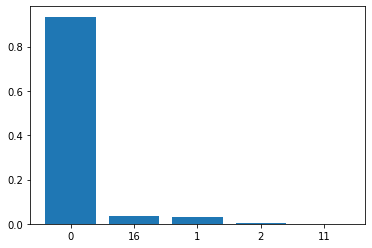

In [41]:
imagePath = "data/Meta/0.png"
image = prepare_image(imagePath)
prediction = predict_image(image, model)
p, s = present_pred(predictions=prediction[0])

print(p)
print(s)
plt.bar(p, s)

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 activation (Activation)     (None, 32, 32, 16)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 activation_1 (Activation)   (None, 16, 16, 32)        0

In [43]:
# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

0 conv2d (None, 32, 32, 16)
4 conv2d_1 (None, 16, 16, 32)
8 conv2d_2 (None, 8, 8, 64)


In [44]:
model.layers[8].output

<KerasTensor: shape=(None, 8, 8, 64) dtype=float32 (created by layer 'conv2d_2')>

In [45]:
first_layer = Model(inputs=model.inputs, outputs=model.layers[8].output)

In [46]:
feature_map = first_layer.predict(image)

In [47]:
feature_map.shape

(1, 8, 8, 64)

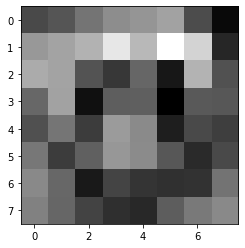

In [49]:
pyplot.imshow(feature_map[0, :, :, 1], cmap='gray')

In [14]:
square = 32
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_map[0, :, :, 16], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

IndexError: index 16 is out of bounds for axis 3 with size 16

In [11]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [10]:
visualizer(model, format='png', view=True)

IndexError: list index out of range

In [6]:
# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [7]:
layer_dict

{'conv2d': <keras.layers.convolutional.Conv2D at 0x1c819ae5370>,
 'activation': <keras.layers.core.activation.Activation at 0x1c81fc10d00>,
 'batch_normalization': <keras.layers.normalization.batch_normalization.BatchNormalization at 0x1c81fc56460>,
 'max_pooling2d': <keras.layers.pooling.MaxPooling2D at 0x1c81fc951c0>,
 'conv2d_1': <keras.layers.convolutional.Conv2D at 0x1c81fc95e80>,
 'activation_1': <keras.layers.core.activation.Activation at 0x1c81fcaa100>,
 'batch_normalization_1': <keras.layers.normalization.batch_normalization.BatchNormalization at 0x1c81fc9bf40>,
 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D at 0x1c81fcb1e50>,
 'conv2d_2': <keras.layers.convolutional.Conv2D at 0x1c81fcaac10>,
 'activation_2': <keras.layers.core.activation.Activation at 0x1c81fc101f0>,
 'batch_normalization_2': <keras.layers.normalization.batch_normalization.BatchNormalization at 0x1c81fcb1a30>,
 'max_pooling2d_2': <keras.layers.pooling.MaxPooling2D at 0x1c81fcb8eb0>,
 'flatten': <keras